<a href="https://colab.research.google.com/github/mitpalorg/police-accountability-lab/blob/master/py_propub_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd 
#https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers
propub = pd.read_csv('https://raw.githubusercontent.com/mitpalorg/police-accountability-lab/master/allegations_20200726939.csv')

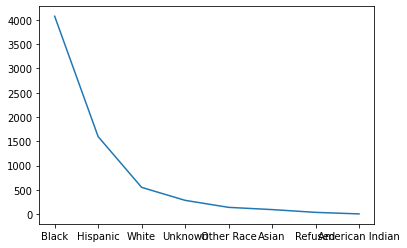

In [2]:
force_propub = propub[propub['fado_type'] == 'Force']

import matplotlib.pyplot as plt
force_propub['complainant_ethnicity'].value_counts().plot()  

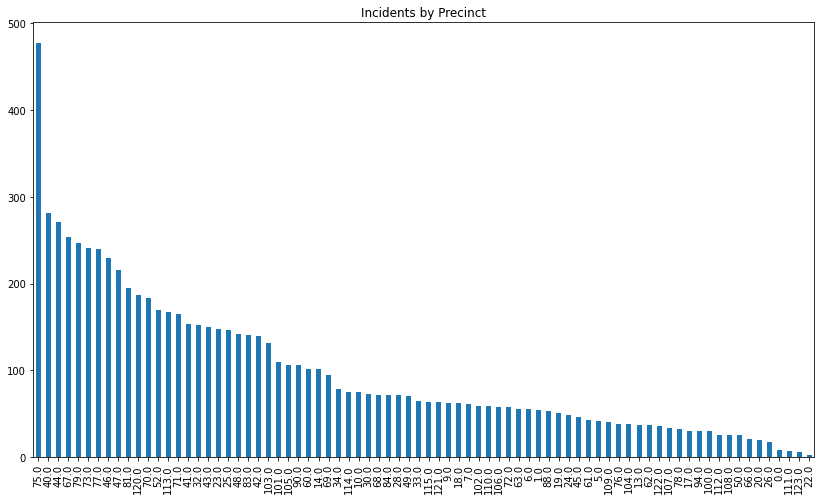

In [3]:
force_propub['precinct'].value_counts().plot(kind="bar", figsize=(14,8), title = "Incidents by Precinct")  

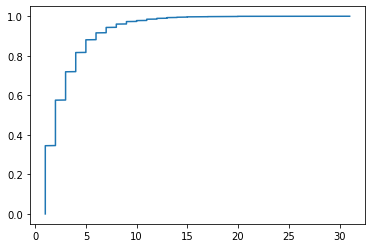

In [5]:
series = force_propub['unique_mos_id'].value_counts()

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(series)

plt.plot(ecdf.x, ecdf.y)
plt.show()
#CDF

# **Map of Force Incidents, Mapbox**

In [6]:
from urllib.request import urlopen
import json
with open('/Users/joebrucker/Downloads/Police Precincts.geojson') as response:
    precincts = json.load(response)

In [50]:
import plotly.express as px

df = pd.DataFrame(force_propub['precinct'].value_counts().reset_index().rename(columns={"precinct": "incidents", "index": "precinct"}))
geojson = precincts

fig = px.choropleth_mapbox(df, geojson=geojson, color="incidents",
                           color_continuous_scale="solar",
                           locations="precinct", featureidkey="properties.precinct",
                           mapbox_style="carto-positron",
                           center = {"lat": 40.699150, "lon": -73.957005},
                           opacity=0.5,
                           zoom=9)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},

                 )

#fig.show()

import plotly.graph_objects as go # or plotly.express as px
#fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: ignored

# **Outcomes by Race**

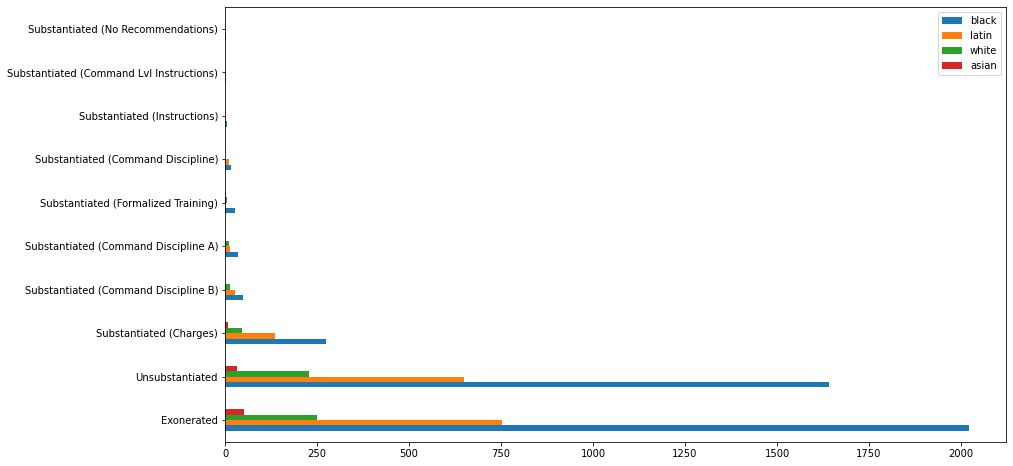

In [49]:
new =pd.DataFrame()
new['black'] = force_propub[force_propub['complainant_ethnicity'] == 'Black']['board_disposition'].value_counts()
new['latin'] = force_propub[force_propub['complainant_ethnicity'] ==  'Hispanic']['board_disposition'].value_counts()
new['white'] = force_propub[force_propub['complainant_ethnicity'] ==  'White']['board_disposition'].value_counts()
new['asian'] = force_propub[force_propub['complainant_ethnicity'] ==  'Asian']['board_disposition'].value_counts()

new.reset_index().plot(kind="barh", figsize=(14,8)).set_yticklabels(new.index.unique())
plt.show()

# **K-Means Clustering**

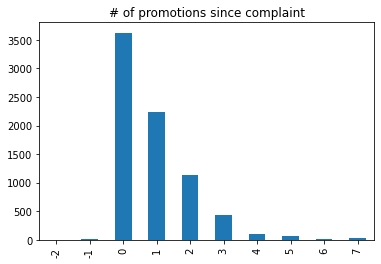

In [13]:
rank_dict = {'Police Officer':1,
 'Detective':2,
 'Sergeant':3,
 'Lieutenant':4 ,
 'Captain':5,
 'Deputy Inspector':6,
 'Inspector':7,
 'Chiefs and other ranks':8}

force_propub['rank_num_now'] = force_propub['rank_now'].replace(rank_dict)
force_propub['rank_num_incident'] = force_propub['rank_incident'].replace(rank_dict)


pd.options.mode.chained_assignment = None  # default='warn'

force_propub['promotions_since_incident'] = force_propub['rank_num_now'] - force_propub['rank_num_incident']
force_propub['promotions_since_incident'].value_counts().sort_index().plot(kind='bar', title = "# of promotions since complaint")

In [14]:
x = ['unique_mos_id',
 'command_now',
 'command_at_incident',
 'rank_abbrev_incident',
 'mos_ethnicity',
 'mos_gender',
 'mos_age_incident',
 'complainant_ethnicity',
 'complainant_gender',
 'complainant_age_incident',
 'allegation',
 'precinct',
 'board_disposition',
 'promotions_since_incident']

trimmed = force_propub[x]

In [15]:
cats = [
     'command_now',
     'command_at_incident',
     'rank_abbrev_incident',
     'mos_ethnicity',
     'mos_gender',
     'complainant_ethnicity',
     'complainant_gender',
     'allegation',
     'board_disposition',
 ]
conts = [
    'promotions_since_incident',
    'mos_age_incident',
    'complainant_age_incident',
    'precinct']

from sklearn.preprocessing import LabelEncoder

trimmed[cats] = trimmed[cats].applymap(str).apply(LabelEncoder().fit_transform)

In [16]:
from sklearn.cluster import KMeans

X = trimmed.dropna().applymap(int)

km = KMeans(
    n_clusters=10, init='k-means++',
    n_init=10, max_iter=700, 
    tol=1e-04, random_state=1
)
y_kmeans = km.fit_predict(X)

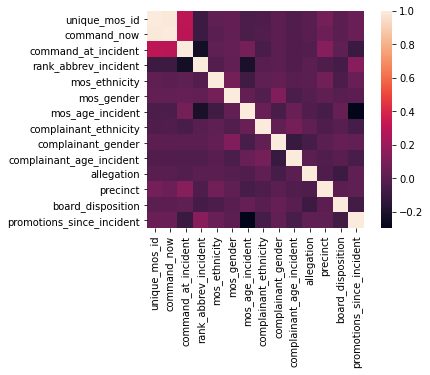

In [17]:
import seaborn as sns
cor = X.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

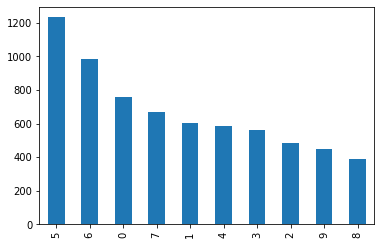

In [18]:
pd.Series(y_kmeans).value_counts().plot(kind='bar')

In [52]:
blarg = X
blarg[''] = 

ValueError: ignored